In [261]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVCfrom sklearn import treeimport math

In [2]:
df=pd.read_csv('spambase[1].data',header=None)

In [3]:
df.columns=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85',
'word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direc','word_freq_cs','word_freq_meeting','word_freq_original',
'word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!',
'char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam']

In [4]:
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [ ]:
#Making inputs dataframe

In [6]:
inputs=df.drop('spam',axis='columns')
inputs.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [ ]:
#Making output dataframe

In [7]:
target=df['spam']
target

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam, Length: 4601, dtype: int64

In [41]:
def accuracy(TN,FP,FN,TP):
    accuracy=(TN+TP)/(TN+FP+FN+TP)
    return accuracy

In [43]:
def precision(TN,FP,FN,TP):
    precision=TP/(FP+TP)
    return precision

In [44]:
def recall(TN,FP,FN,TP):
    recall=TP/(FN+TP)
    return recall

In [56]:
def f1_score(TN,FP,FN,TP):
    f1=2*(TP/(FP+TP))*(TP/(FN+TP))/((TP/(FP+TP))+(TP/(FN+TP)))
    return f1

In [8]:
from sklearn.model_selection import train_test_split

Splitting Dataset Randomly,Applying Logistic Regression

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(inputs,target,test_size=0.2,random_state=41)

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(LogisticRegression(max_iter=5000),{
    'C':[i for i in range(1,10)]},cv=5)
model.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [159]:
dataframe=pd.DataFrame(model.cv_results_)
dataframe[['param_C','mean_test_score','rank_test_score']]

,param_C,mean_test_score,rank_test_score
0,1,0.922283,9
1,2,0.925000,3
2,3,0.925272,1
3,4,0.924185,7
4,5,0.925000,3
5,6,0.925272,1
6,7,0.924728,5
7,8,0.923913,8
8,9,0.924728,5


Choosing C value based on GridSearch Algorithm

In [160]:
model1=LogisticRegression(max_iter=5000,C=3)
model1.fit(X_train,Y_train)

LogisticRegression(C=3, max_iter=5000)

In [263]:
pred=model1.predict(X_test)

In [162]:
cm1=confusion_matrix(Y_test,pred)

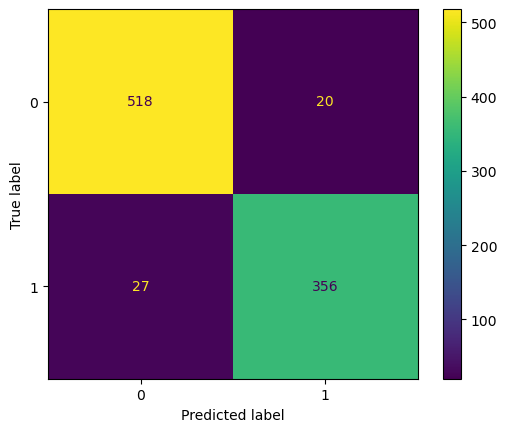

In [163]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=model1.classes_)
disp.plot()

In [164]:
#True Negatives,False Positives,False Negatives,True Positives

In [165]:
TN1,FP1,FN1,TP1=confusion_matrix(Y_test,pred).ravel()

In [166]:
TN1,FP1,FN1,TP1

(518, 20, 27, 356)

In [222]:
acc1=accuracy(TN1,FP1,FN1,TP1)
prec1=precision(TN1,FP1,FN1,TP1)
rec1=recall(TN1,FP1,FN1,TP1)
f1_1=f1_score(TN1,FP1,FN1,TP1)

In [225]:
scores1=[acc1,prec1,rec1,f1_1]

In [217]:
with open('LogRegression','wb') as f:
    pickle.dump(model1,f)

Applying Support Vector Machine Classification

In [202]:
model=GridSearchCV(SVC(),{
    'C':[i for i in range(1,10)]
},cv=5)
model.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [203]:
dataframe=pd.DataFrame(model.cv_results_)
dataframe[['param_C','mean_test_score','rank_test_score']]

,param_C,mean_test_score,rank_test_score
0,1,0.703261,9
1,2,0.723641,7
2,3,0.723913,6
3,4,0.724185,5
4,5,0.723641,7
5,6,0.725815,4
6,7,0.726630,3
7,8,0.727717,1
8,9,0.727717,1


Choosing C value based on GridSearch Algorithm

In [19]:
from sklearn.svm import SVC

In [210]:
model2=SVC(C=9)
model2.fit(X_train,Y_train)

SVC(C=9)

In [211]:
pred2=model2.predict(X_test)

In [212]:
cm2=confusion_matrix(Y_test,pred2)

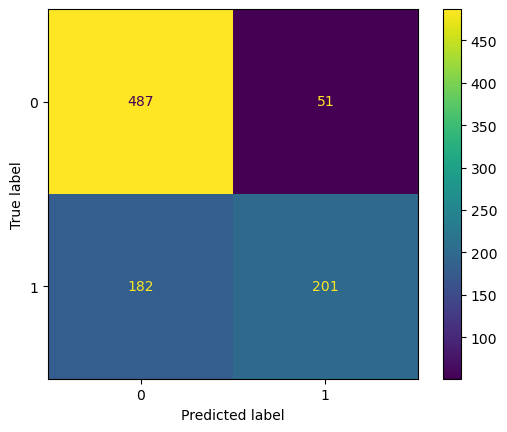

In [213]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=model2.classes_)
disp.plot()

In [214]:
TN2,FP2,FN2,TP2=confusion_matrix(Y_test,pred2).ravel()
TN2,FP2,FN2,TP2

(487, 51, 182, 201)

In [228]:
acc2=accuracy(TN2,FP2,FN2,TP2)
prec2=precision(TN2,FP2,FN2,TP2)
rec2=recall(TN2,FP2,FN2,TP2)
f1_2=f1_score(TN2,FP2,FN2,TP2)

In [229]:
scores2=[acc2,prec2,rec2,f1_2]

In [216]:
with open('SVM','wb') as f:
    pickle.dump(model2,f)

Applying Support Naive Bayes


In [171]:
from sklearn.naive_bayes import GaussianNB
model3=GaussianNB()

In [172]:
model3.fit(X_train,Y_train)

GaussianNB()

In [173]:
pred3=model3.predict(X_test)

In [174]:
cm3=confusion_matrix(Y_test,pred3)

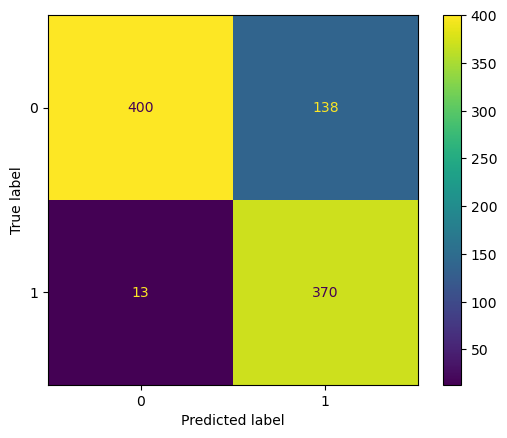

In [175]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=model3.classes_)
disp.plot()

In [80]:
TN3,FP3,FN3,TP3=confusion_matrix(Y_test,pred3).ravel()

In [82]:
TN3,FP3,FN3,TP3

(400, 138, 13, 370)

In [230]:
acc3=accuracy(TN3,FP3,FN3,TP3)
prec3=precision(TN3,FP3,FN3,TP3)
rec3=recall(TN3,FP3,FN3,TP3)
f1_3=f1_score(TN3,FP3,FN3,TP3)

In [231]:
scores3=[acc3,prec3,rec3,f1_3]

In [218]:
with open('GaussianNB','wb') as f:
    pickle.dump(model3,f)

Applying Support Decision Tree

In [188]:
model4=tree.DecisionTreeClassifier(random_state=25)

In [189]:
model4.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=25)

In [190]:
pred4=model4.predict(X_test)

In [191]:
cm4=confusion_matrix(Y_test,pred4)

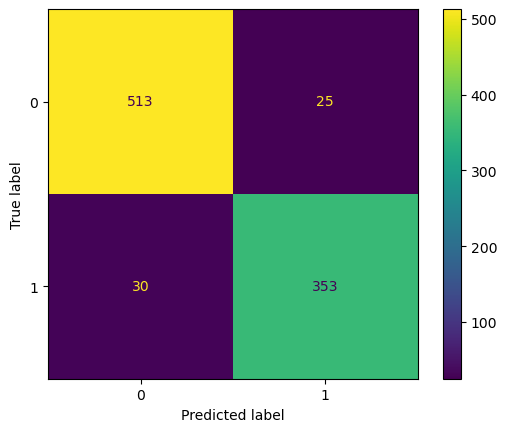

In [192]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=model4.classes_)
disp.plot()

In [193]:
TN4,FP4,FN4,TP4=confusion_matrix(Y_test,pred4).ravel()

In [194]:
TN4,FP4,FN4,TP4

(513, 25, 30, 353)

In [232]:
acc4=accuracy(TN4,FP4,FN4,TP4)
prec4=precision(TN4,FP4,FN4,TP4)
rec4=recall(TN4,FP4,FN4,TP4)
f1_4=f1_score(TN4,FP4,FN4,TP4)

In [233]:
scores4=[acc4,prec4,rec4,f1_4]

In [219]:
with open('DecisionTree','wb') as f:
    pickle.dump(model4,f)

Applying Support Random Forest Classification

In [138]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier()

In [139]:
model5.fit(X_train,Y_train)

RandomForestClassifier()

In [140]:
pred5=model5.predict(X_test)

In [141]:
cm5=confusion_matrix(Y_test,pred5)

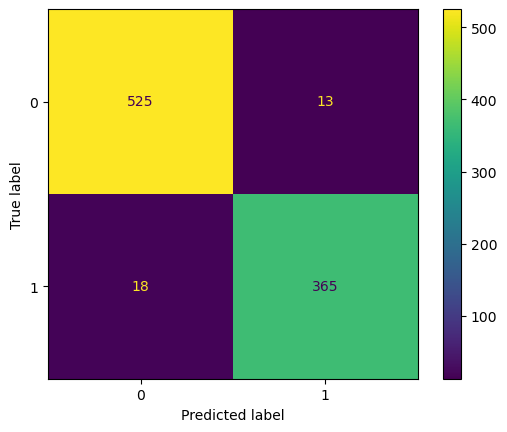

In [142]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=model5.classes_)
disp.plot()

In [143]:
TN5,FP5,FN5,TP5=confusion_matrix(Y_test,pred5).ravel()

In [144]:
TN5,FP5,FN5,TP5

(525, 13, 18, 365)

In [234]:
acc5=accuracy(TN5,FP5,FN5,TP5)
prec5=precision(TN5,FP5,FN5,TP5)
rec5=recall(TN5,FP5,FN5,TP5)
f1_5=f1_score(TN5,FP5,FN5,TP5)

In [220]:
with open('RandomForest','wb') as f:
    pickle.dump(model5,f)

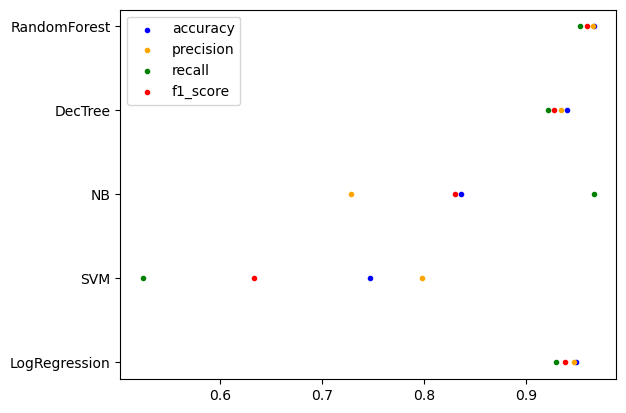

In [264]:
accuracies=[acc1,acc2,acc3,acc4,acc5]
precisions=[prec1,prec2,prec3,prec4,prec5]
recalls=[rec1,rec2,rec3,rec4,rec5]
f1_scores=[f1_1,f1_2,f1_3,f1_4,f1_5]
plt.scatter(accuracies,['LogRegression','SVM','NB','DecTree','RandomForest'],marker='.',color='blue')
plt.scatter(precisions,['LogRegression','SVM','NB','DecTree','RandomForest'],marker='.',color='orange')
plt.scatter(recalls,['LogRegression','SVM','NB','DecTree','RandomForest'],marker='.',color='green')
plt.scatter(f1_scores,['LogRegression','SVM','NB','DecTree','RandomForest'],marker='.',color='red')
plt.legend(['accuracy','precision','recall','f1_score'])

RandomForest is the Best Model